# Physics HW6

In [14]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

## 2c) Anharmonic Oscillator

In [15]:
hbar = 1
m = 1
w = 1
lamb = .01
n_max = 5

a = destroy(n_max)
a_dag = create(n_max)

x = position(5)
H0 = hbar*w*(a_dag * a + .5 * (qeye(5)))
V = lamb * (x**4)
H = H0 + V

eigenenergies = H.eigenenergies()

#Energy correctoins for |0> and |1> found from the hamiltonian
print("Eigenenergies of the system from Hamiltonian diagonalization:")
for i, energy in enumerate(eigenenergies):
    if i ==0 or i ==1:
        print(f"State {i}: {energy:.5f}")

#Energy correction values from 2a,2b done by hand:
E0_base = .5
E1_base = 1.5
E0_order1 = .0075
E1_order1 = .0375
E0_order2 = -.000225
E1_order2 = -.00168

E0 = E0_base + E0_order1 + E0_order2
E1 = E1_base + E1_order1 + E1_order2

print("Eigenenergies of the system from pertubation theory calculations:")
print(f"State {0}: {E0:.5f}")
print(f"State {1}: {E1:.5f}")

Eigenenergies of the system from Hamiltonian diagonalization:
State 0: 0.50725
State 1: 1.53572
Eigenenergies of the system from pertubation theory calculations:
State 0: 0.50727
State 1: 1.53582


For the same nmax, its clear that parts b and c agree on the energy corrections to the system. If I were to raise my n_max they would agree to an even greater degree.

## 4) Jaynes Cummings Hamiltonian

In [16]:
w0 = 2*np.pi
g = w0/100
w = w0
N = 10 #this is the maximum dimension were rockin with

a = tensor(qeye(2), destroy(N)) 
a_dag = tensor(qeye(2), create(N))
sm = tensor(sigmam(), qeye(N))  
sp = tensor(sigmap(), qeye(N))
sz = tensor(sigmaz(), qeye(N))  


H = ((w0/2)*sz) + (w*(a_dag*a + .5)) + ((g/2)*(sp*a + sm*a_dag))

def time_ev_op(t):
    return (-1j*H*t).expm()

## a)

### i)

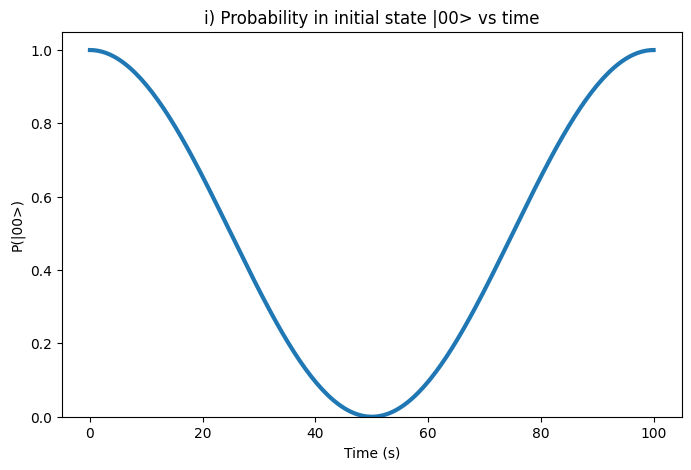

In [20]:
psi0 = tensor(basis(2,0), basis(N,0))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_00 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_00.append(np.abs(state[0,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_00, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|00>)")
plt.title("i) Probability in initial state |00> vs time")
plt.show()

### ii)

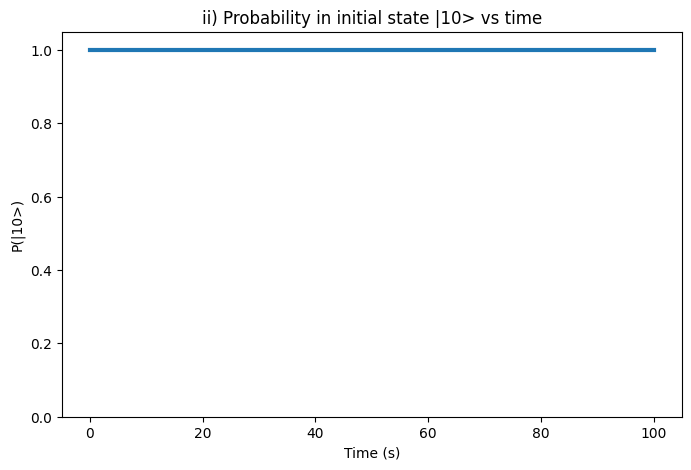

In [21]:
psi0 = tensor(basis(2,1), basis(N,0))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_10 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_10.append(np.abs(state[N,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_10, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|10>)")
plt.title("ii) Probability in initial state |10> vs time")
plt.show()

### iii)

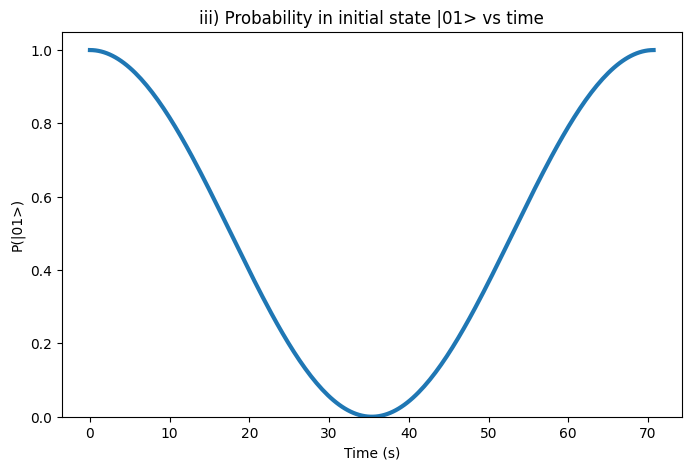

In [22]:
psi0 = tensor(basis(2,0), basis(N,1))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_01 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_01.append(np.abs(state[1,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_01, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|01>)")
plt.title("iii) Probability in initial state |01> vs time")
plt.show()

### iv)

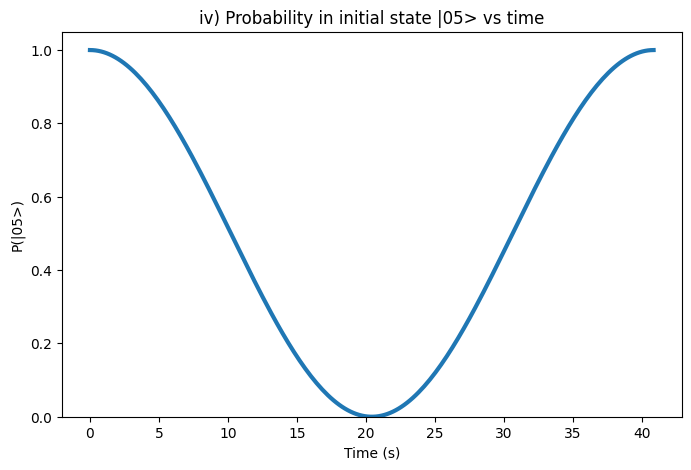

In [23]:
psi0 = tensor(basis(2,0), basis(N,5))
n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_05 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_05.append(np.abs(state[5,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_05, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|05>)")
plt.title("iv) Probability in initial state |05> vs time")
plt.show()

### v)

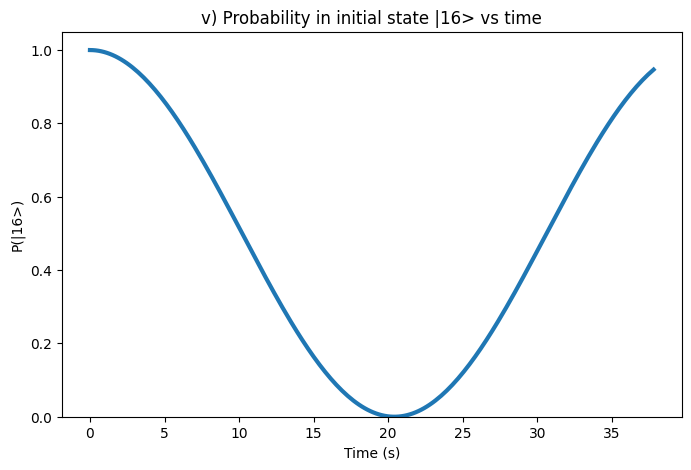

In [24]:
psi0 = tensor(basis(2,1), basis(N,6))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_16 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_16.append(np.abs(state[N+6,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_16, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|16>)")
plt.title("v) Probability in initial state |16> vs time")

plt.show()

## b)

### i)

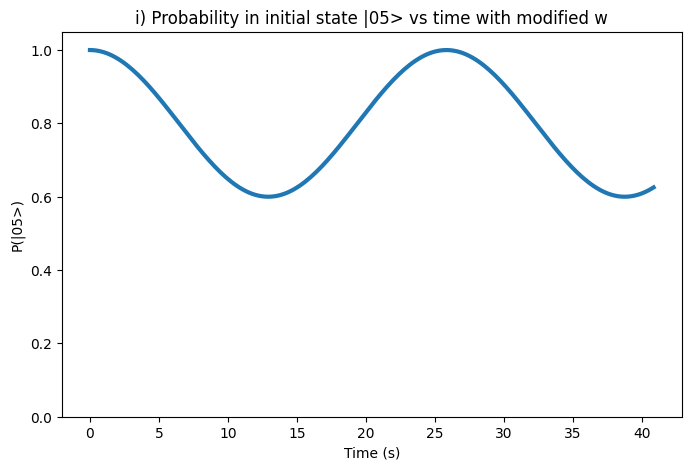

In [26]:
w = w0*1.03
H = ((w0/2)*sz) + (w*(a_dag*a + .5)) + ((g/2)*(sp*a + sm*a_dag))

psi0 = tensor(basis(2,0), basis(N,5))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_05 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_05.append(np.abs(state[5,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_05, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.title("i) Probability in initial state |05> vs time with modified w")
plt.ylabel("P(|05>)")
plt.show()

### ii)

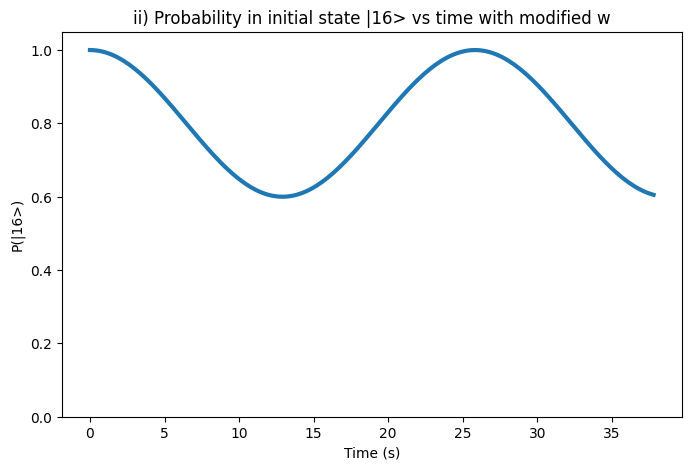

In [27]:
w = w0*1.03
H = ((w0/2)*sz) + (w*(a_dag*a + .5)) + ((g/2)*(sp*a + sm*a_dag))

psi0 = tensor(basis(2,1), basis(N,6))

n = expect(a.dag() * a, psi0)
Omega_R = 2 * g * np.sqrt(n + 1)
T = 4 * np.pi / Omega_R   # Period of oscillation
times = np.linspace(0,T,200)


prob_in_16 = []
for t in times:
    state = time_ev_op(t)*psi0
    prob_in_16.append(np.abs(state[N+6,0])**2)
fig = plt.figure(figsize=(8,5))
plt.plot(times, prob_in_16, linewidth=3)
plt.xlabel("Time (s)")
plt.ylim(0,1.05)
plt.ylabel("P(|16>)")
plt.title("ii) Probability in initial state |16> vs time with modified w")
plt.show()